# PREDICTING TELECOM USERS CHURN

 Author : Oke Victor Oluwaseun

 Date: 15/04/2021

## WHAT IS CHURN RATE?

Is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses, as it's often the case that acquiring new customers is a lot more costly than retaining existing ones (in some cases, 5 to 20 times more expensive). 

##### Remember: "Customer Retention is better than Customer Acquisition"

## Problem Definition

In this python project, we would be predicting customers churn for a telecommunication company.

Predicting churn is particularly important for businesses w/ subscription models such as cell phone, cable, or merchant credit card processing plans. But modeling churn has wide reaching applications in many domains. For example, casinos have used predictive models to predict ideal room conditions for keeping patrons at the blackjack table and when to reward unlucky gamblers with front row seats to Celine Dion. Similarly, airlines may offer first class upgrades to complaining customers, etc. Remember: Customer Retention is better than Customer Acquisition

## Data Description

## Content


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges Demographic info about customers – gender, age range, and if they have partners and dependents

## Files


Each row represents a telecom user , each column contains telecom user's attributes described on the column Metadata.

The raw data contains 5986 rows (customers) and 22 columns (features).

The “Churn” column is our target.

## Imports and Datasets

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
Telecom_Project = pd.read_csv('telecom_users.csv')

##  Information of the Data

In [3]:
print (' Head of the Data')
Telecom_Project.head()

 Head of the Data


,Number,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
print('Tail of the Data')
Telecom_Project.tail()

Tail of the Data


,Number,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [5]:
print ("\nShape of the data")
Telecom_Project.shape


Shape of the data


(5986, 22)

## Show Data Types

In [6]:
Telecom_Project.dtypes

Number                int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Display Columns

In [7]:
Telecom_Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [8]:
print("\nColumn Names")
Telecom_Project.columns.values


Column Names


array(['Number', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

## Descriptive Statistics

In [9]:
Telecom_Project.describe()

,Number,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


## Data Cleaning

In [10]:
Telecom_Project.isnull().sum()

Number              0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

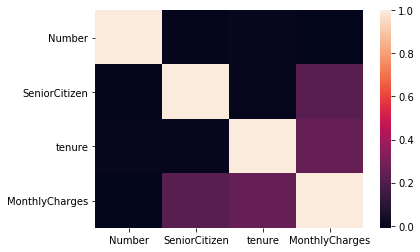

In [11]:
sns.heatmap(Telecom_Project.corr())

## Spliting out the Variable into Categorical and Numerical Variable

In [12]:
Telecom_Project['TotalCharges']=pd.to_numeric(Telecom_Project['TotalCharges'],downcast='float',errors='coerce')

In [13]:
Numerical_variable=Telecom_Project.select_dtypes(include=['float64','int64','int32','float32'])

In [14]:
Numerical_variable.head()

,Number,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1869,0,72,24.10,1734.650024
1,4528,0,44,88.15,3973.199951
2,6344,1,38,74.95,2869.850098
3,6739,0,4,55.90,238.500000
4,432,0,2,53.45,119.500000


In [15]:
Categorical_variable=Telecom_Project.select_dtypes(include=['object'])

In [16]:
Categorical_variable.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7010-BRBUU,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No
1,9688-YGXVR,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
2,9286-DOJGF,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
3,6994-KERXL,Male,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
4,2181-UAESM,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,No


## Show the percentage of Customers that stayed and left

In [17]:
num_re =Telecom_Project[Telecom_Project.Churn == 'No'].shape[0]
num_chu = Telecom_Project[Telecom_Project.Churn == 'Yes'].shape[0]
print('Percentage of Customers that Stayed')
num_re/ (num_re + num_chu)* 100

Percentage of Customers that Stayed


73.48813899097894

In [18]:
num_re =Telecom_Project[Telecom_Project.Churn == 'No'].shape[0]
num_chu = Telecom_Project[Telecom_Project.Churn == 'Yes'].shape[0]
print('Percentage of Customers that Left')
num_chu/ (num_re + num_chu)* 100

Percentage of Customers that Left


26.511861009021047

## Data Visualization

Let see the counts of male and female customers

In [19]:
Telecom_Project['gender'].value_counts()

Male      3050
Female    2936
Name: gender, dtype: int64

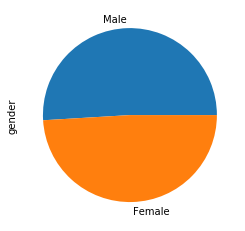

In [20]:
Telecom_Project['gender'].value_counts().plot(kind='pie')

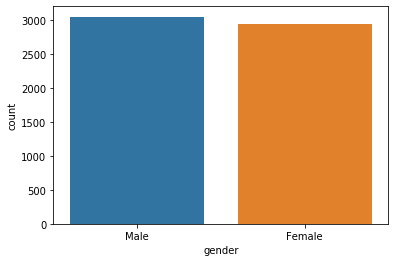

In [21]:
sns.countplot(Telecom_Project['gender'])

In [22]:
Telecom_Project['Dependents'].value_counts()

No     4195
Yes    1791
Name: Dependents, dtype: int64

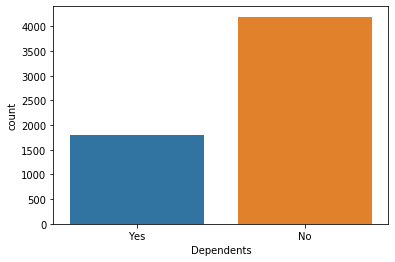

In [23]:
sns.countplot(Telecom_Project['Dependents'])

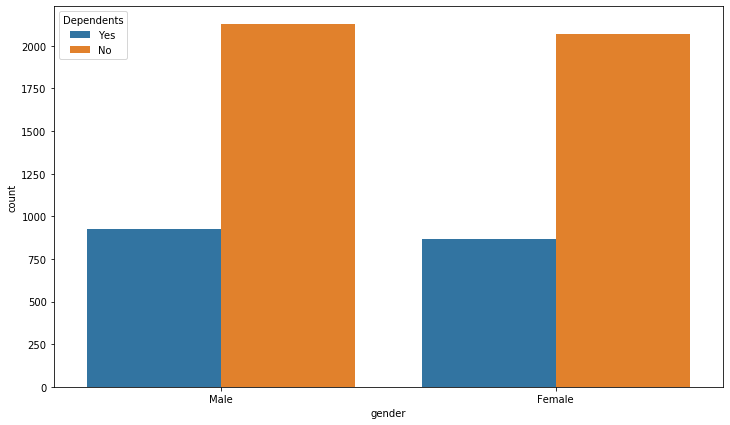

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='gender',hue='Dependents',data=Telecom_Project)

In [25]:
Telecom_Project['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

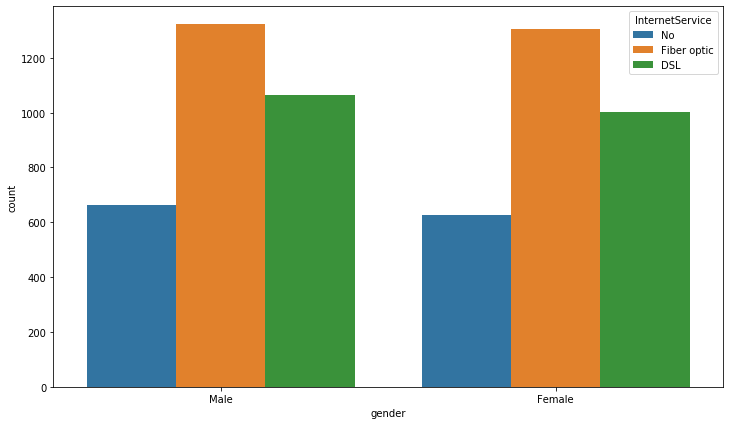

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(x='gender',hue='InternetService',data=Telecom_Project)

Let see the Churn counts

In [27]:
Telecom_Project['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

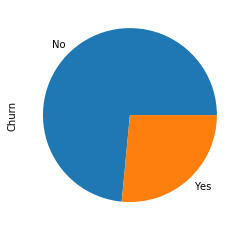

In [28]:
Telecom_Project['Churn'].value_counts().plot(kind='pie')

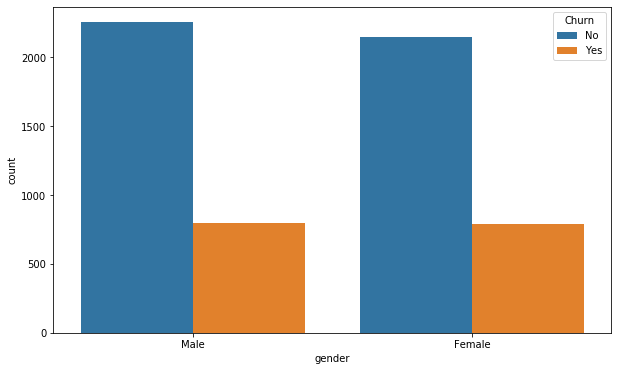

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='Churn',data=Telecom_Project)

In [30]:
Telecom_Project['Partner'].value_counts()

No     3082
Yes    2904
Name: Partner, dtype: int64

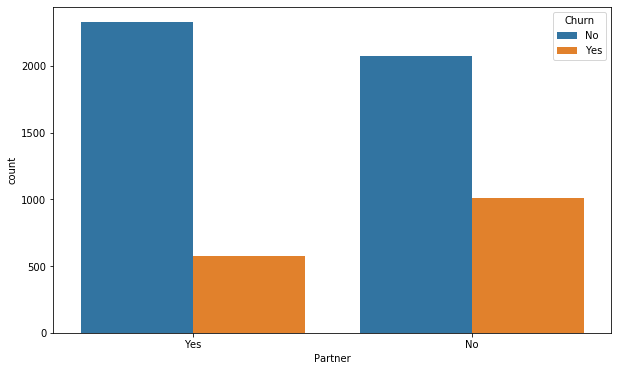

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Partner',hue='Churn',data=Telecom_Project)

In [32]:
Telecom_Project['PhoneService'].value_counts()

Yes    5396
No      590
Name: PhoneService, dtype: int64

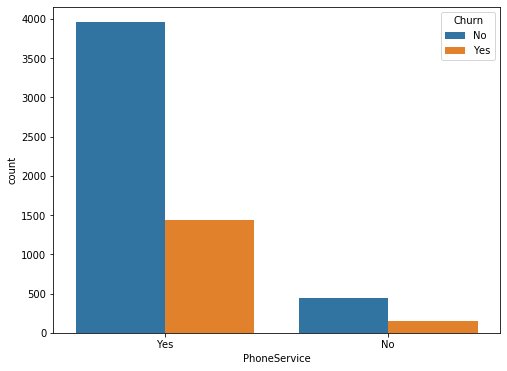

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='PhoneService',hue='Churn',data=Telecom_Project)

In [34]:
Telecom_Project['MultipleLines'].value_counts()

No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64

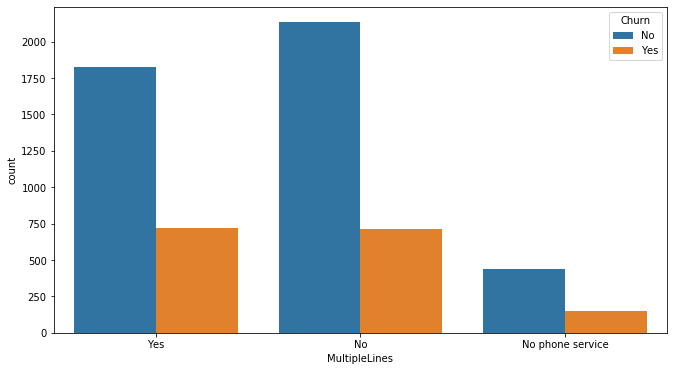

In [35]:
plt.figure(figsize=(11,6))
sns.countplot(x='MultipleLines',hue='Churn',data=Telecom_Project)

In [36]:
Telecom_Project['OnlineSecurity'].value_counts()

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64

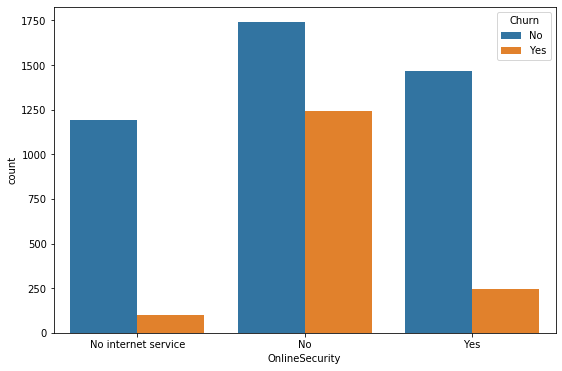

In [37]:
plt.figure(figsize=(9,6))
sns.countplot(x='OnlineSecurity',hue='Churn',data=Telecom_Project)

In [38]:
Telecom_Project['OnlineBackup'].value_counts()

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64

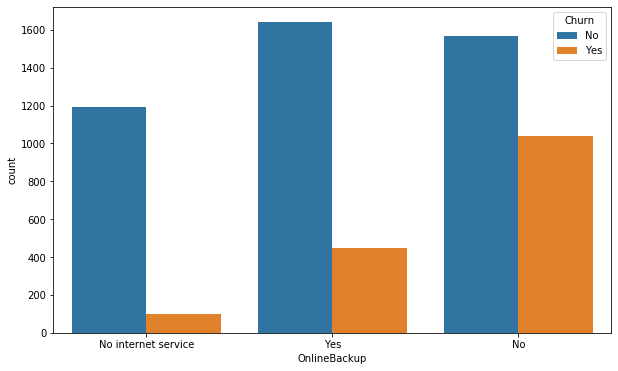

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='OnlineBackup',hue='Churn',data=Telecom_Project)

In [40]:
Telecom_Project['DeviceProtection'].value_counts()

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64

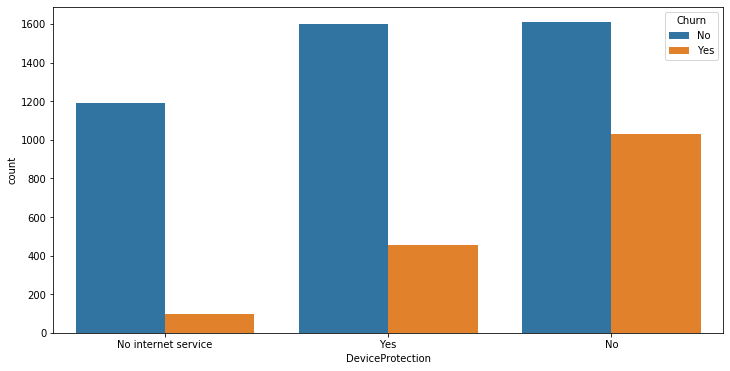

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='DeviceProtection',hue='Churn',data=Telecom_Project)

In [42]:
Telecom_Project['TechSupport'].value_counts()

No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64

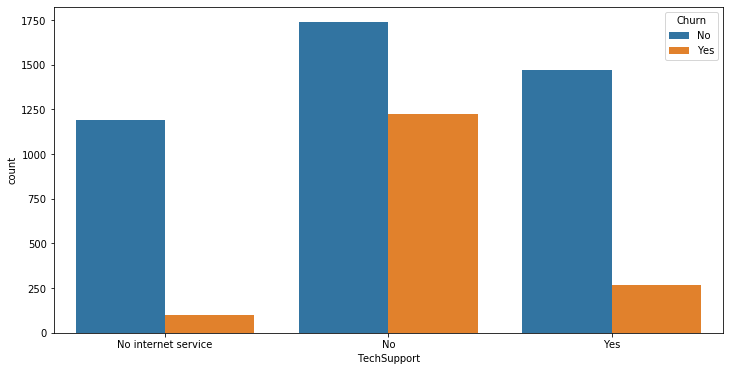

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='TechSupport',hue='Churn',data=Telecom_Project)

In [44]:
Telecom_Project['StreamingTV'].value_counts()

No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64

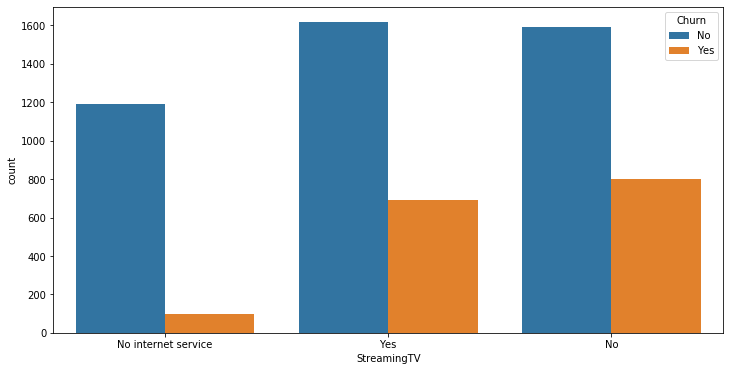

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='StreamingTV',hue='Churn',data=Telecom_Project)

In [46]:
Telecom_Project['StreamingMovies'].value_counts()

No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64

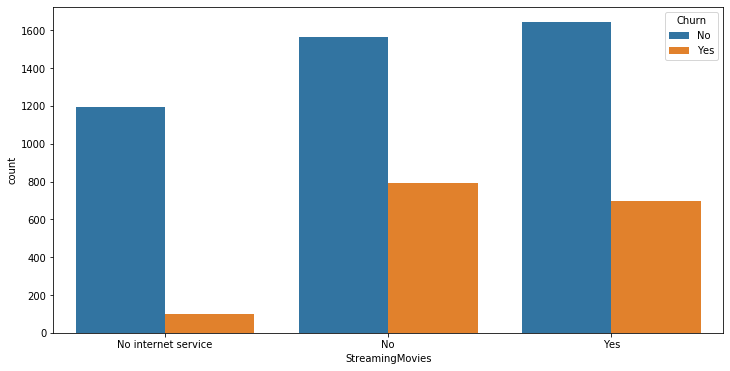

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='StreamingMovies',hue='Churn',data=Telecom_Project)

In [48]:
Telecom_Project['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

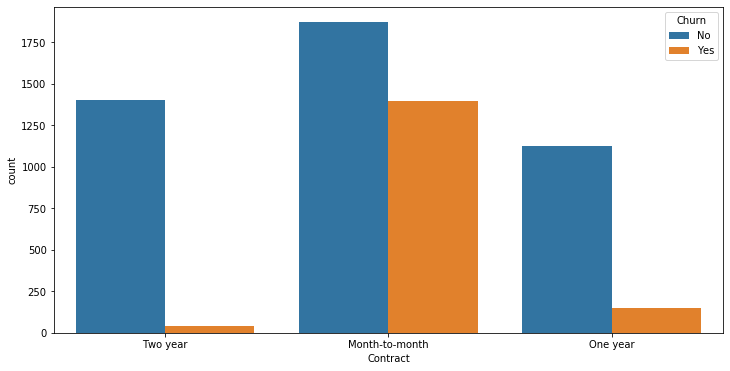

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='Contract',hue='Churn',data=Telecom_Project)

In [50]:
Telecom_Project['PaperlessBilling'].value_counts()

Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64

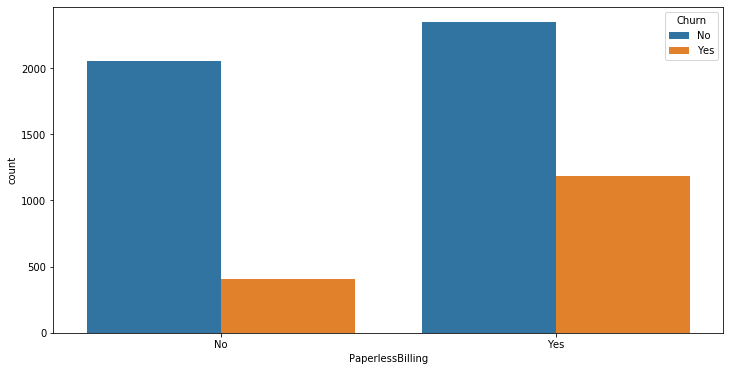

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='PaperlessBilling',hue='Churn',data=Telecom_Project)

## Distribution Visualization

The distribution of customers tenure

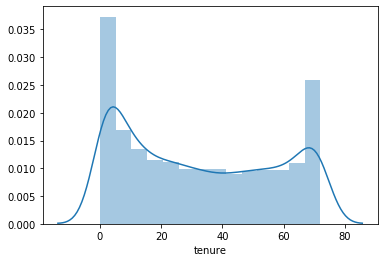

In [52]:
sns.distplot(Telecom_Project['tenure'])

The distribution of customers monthly charges

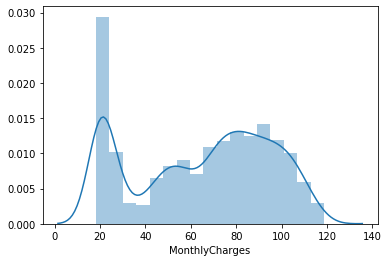

In [53]:
sns.distplot(Telecom_Project['MonthlyCharges'])

The distribution of customers total charges

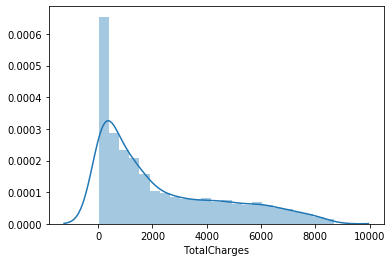

In [54]:
sns.distplot(Telecom_Project['TotalCharges'])

Churn counts of customer tenure

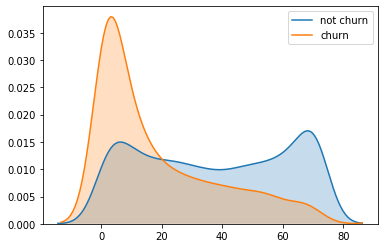

In [55]:
sns.kdeplot(Telecom_Project['tenure'].loc[Telecom_Project['Churn']=='No'],label='not churn',shade=True); 
sns.kdeplot(Telecom_Project['tenure'].loc[Telecom_Project['Churn']=='Yes'],label='churn',shade=True); 


Churn counts of customer monthly charges

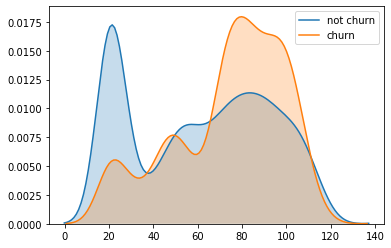

In [56]:
sns.kdeplot(Telecom_Project['MonthlyCharges'].loc[Telecom_Project['Churn']=='No'],label='not churn', shade=True);
sns.kdeplot(Telecom_Project['MonthlyCharges'].loc[Telecom_Project['Churn']=='Yes'],label='churn', shade=True);


## Feature Engineering & PreProcessing

In [57]:
Telecom_Project=Telecom_Project.drop([ 'Number','customerID'],axis=1)

In [58]:
Telecom_Project.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.650024,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.199951,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.850098,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.500000,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.500000,No


In [59]:
Telecom_Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [60]:
Telecom_Project.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Handling and Changing of  Categorical Variables

In [61]:
for column in Telecom_Project.columns:
    if Telecom_Project[column].dtype == np.number:
        continue
    Telecom_Project[column] =LabelEncoder().fit_transform(Telecom_Project[column])
 

In [62]:
Telecom_Project=Telecom_Project.drop(['gender','Partner','Dependents','PhoneService','PaperlessBilling'],axis=1)

In [63]:
Telecom_Project.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,72,2,2,1,1,1,1,1,1,2,1,24.10,2979,0
1,0,44,0,1,0,2,2,0,2,0,0,1,88.15,4181,0
2,1,38,2,1,0,0,0,0,0,0,0,0,74.95,3674,1
3,0,4,0,0,0,0,0,0,0,2,0,2,55.90,858,0
4,0,2,0,0,2,0,2,0,0,0,0,2,53.45,513,0


## Spliting of Data

In [62]:
y = Telecom_Project["Churn"]
X = Telecom_Project.drop(labels = ["Churn"],axis = 1)
X = StandardScaler().fit_transform(X)
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Modelling and Evaluation

In [63]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\oluwaseun gfx\anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn import metrics
prediction_test = logmodel.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8013355592654424


In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       895
           1       0.64      0.50      0.56       303

    accuracy                           0.80      1198
   macro avg       0.74      0.70      0.72      1198
weighted avg       0.79      0.80      0.79      1198

